In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

Ignore the next three cells if running on your personal machine:

In [2]:
from google.colab import auth
from google.auth import default
import gspread
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [3]:
records = gc.open('Lecture 5 Survey (Responses)').sheet1.get_all_records()
df = pd.DataFrame(records)
list(df.columns)

['Timestamp',
 'kerb',
 "How many hours would you say you've dedicated to working on your pokerbot so far?",
 'How would you rate the pace of the lectures?',
 'How would you rate the quality of support in office hours and on piazza?',
 'How often do you attend lecture?',
 'How often do you attend recitation/office hours?',
 'Rate your enjoyment of Pokerbots 2025 so far:',
 'Did you attend our poker social last week?',
 'Do you plan to come to the Hackathon tomorrow night (1/15) at 7PM in 32-044?',
 "Any other comments? (Suggest a lecture/recitation topic, ideas for prizes, lunch recommendations, anything you're excited/indifferent about, etc.)",
 'Favorite part of class so far:',
 'Least favorite part of class so far:']

In [4]:
df.columns = ['timestamp', 'kerb', 'hours', 'pace', 'support', 'lecture', 'oh','enjoyment', 'social', 'hackathon', 'etc', 'best', 'worst'] # rename columns
df[['social', 'hackathon']] = df[['social', 'hackathon']].replace({'Yes': '1', 'No': '0'}).astype(int) # replace Yes and No with 1 and 0
df[['etc', 'best', 'worst']] = df[['etc', 'best', 'worst']].map(len) # replace free response entries with their length
df = df.drop(columns=['timestamp', 'kerb']) # drop timestamp and kerb
df.to_csv('data.csv', index=False)

In [6]:
df = pd.read_csv('data.csv')

In [5]:
df.head()

,hours,pace,support,lecture,oh,enjoyment,social,hackathon,etc,best,worst
0,6.0,3,3,5,1,2,0,1,2,6,8
1,20.0,3,3,4,1,4,0,0,4,7,5
2,5.0,3,3,3,2,4,0,1,3,8,31
3,5.0,3,4,5,1,4,0,1,23,28,3
4,9.0,3,5,2,1,3,0,1,23,8,13


In [7]:
df.corr()['hackathon'].sort_values()

,hackathon
hours,-0.211047
best,-0.109215
pace,-0.019559
lecture,-0.018089
enjoyment,-0.009089
worst,-0.008112
social,0.059479
support,0.087895
etc,0.132699
oh,0.158008


In [8]:
input_features = ['hours', 'support', 'oh', 'social', 'etc', 'best']
label_column = 'hackathon'

In [15]:
X, y = df[input_features], df[label_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print(f"Train accuracy: {model.score(X_train, y_train)}")
print(f"Test accuracy: {model.score(X_test, y_test)}")

Train accuracy: 0.7307692307692307
Test accuracy: 0.6153846153846154


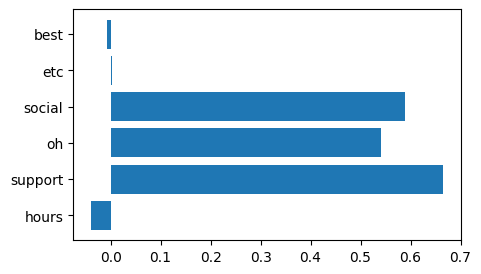

In [10]:
plt.figure(figsize=(5,3))
plt.barh(input_features, model.coef_[0])
plt.show()

In [16]:
cv_scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation accuracy:", cv_scores.mean())

Mean cross-validation accuracy: 0.6615384615384615
